In [1]:
%matplotlib inline
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

from matplotlib import pylab as plt
import numpy as np
from glob import glob
from util import *
from model import *
from tqdm import tqdm_notebook
from prefetch_generator import BackgroundGenerator

/home/woody/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/woody/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


image_dim_ordering:tf


In [2]:
#load images
serv = ".."
pathimg = serv+"/data/image/"
pathans = serv+"/data/image red/"
size = 64
resize = 64

img = [cv2.imread(name)[:, :,::-1] for name in sorted(glob(pathimg + "*"))]
ans = [cv2.imread(name)[:, :,::-1] for name in sorted(glob(pathans + "*"))]

In [3]:
# ready for training/visualization
import tensorflow as tf
# config = tf.ConfigProto(#device_count={'GPU': 0},
#             gpu_options=tf.GPUOptions(allow_growth=True, visible_device_list="0"))
# session = tf.Session(config=config)
session = tf.Session()
model_size = resize
classes = 1
mod = get_net2(model_size, classes, session=session)
mod.load_weights(serv + "/model/model.h5")

HBox(children=(IntProgress(value=0, max=25), HTML(value='')))

3138


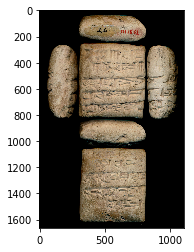

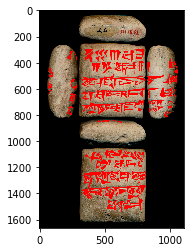

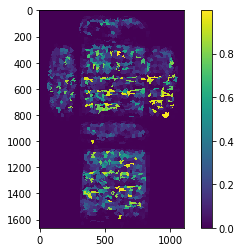

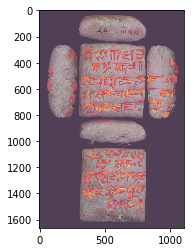

In [4]:
#visualization of image
res = []
for i in range(1):
    test = img[i]
    testans = ans[i]
    res.append(visualize(mod, test, size=size, resize=model_size, division=3500, batch_size=128))
    plt.imshow(test)
    plt.show()
    plt.imshow(testans)
    plt.show()
    plt.imshow(res[i])
    plt.colorbar()
    plt.show()
    plt.imshow(res[i],alpha=0.5)
    plt.imshow(testans,alpha=0.5)
    plt.show()

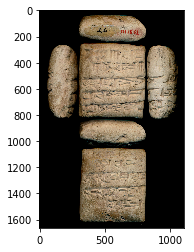

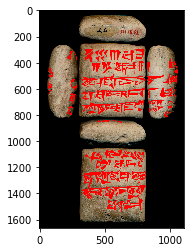

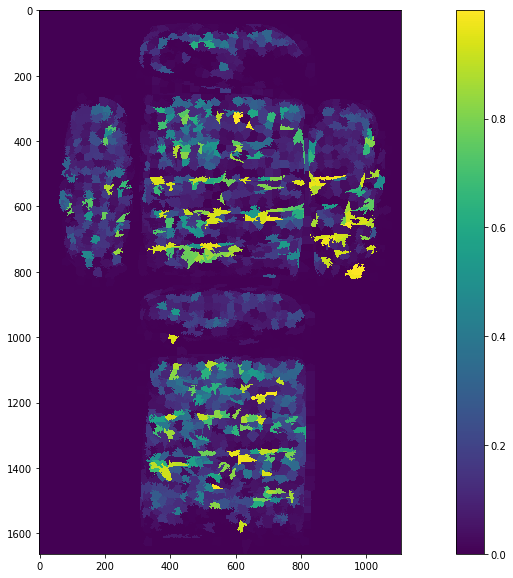

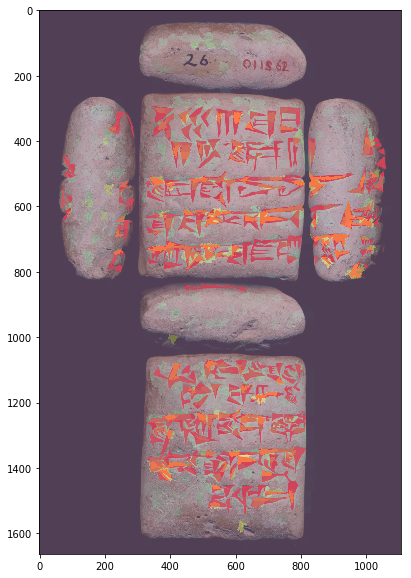

In [14]:
#2回目以降はこれを実行でOK(推論した結果が既にあるので、それを表示する）
for i in range(1):
    test = img[i]
    testans = ans[i]
    plt.imshow(test)
    plt.show()
    plt.imshow(testans)
    plt.show()
    plt.figure(figsize=(20,10))
    plt.imshow(res[i])
    plt.colorbar()
    plt.show()
    plt.figure(figsize=(20,10))
    plt.imshow(res[i],alpha=0.5)
    plt.imshow(testans,alpha=0.5)
    plt.show()